# Overview

This is a notebook to get the general idea of the data that the models are trained on. This has no direct application to the models themselves.

In [12]:
#Load dataset
import torch
import pandas as pd
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch.nn as nn
from torch.optim import Adam
from tqdm import tqdm
import numpy as np
import time
import datetime
import os

def load_image(image_path):
    # Open the image file
    with open(image_path, "rb") as f:
        image = Image.open(f)
        image = image.convert("RGB")  # Convert to RGB if not already
    return image

train_data = pd.read_csv("./data/train.csv")      
train_data["PCI"]
    
test_data = pd.read_csv("./data/test.csv")

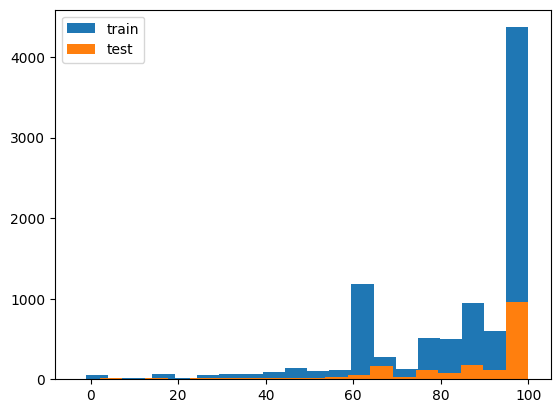

In [13]:
from matplotlib import pyplot as plt

# plot distribution of PCIs
plt.hist(train_data["PCI"], bins=20)
plt.hist(test_data["PCI"], bins=20)
plt.legend(["train", "test"])
plt.show()

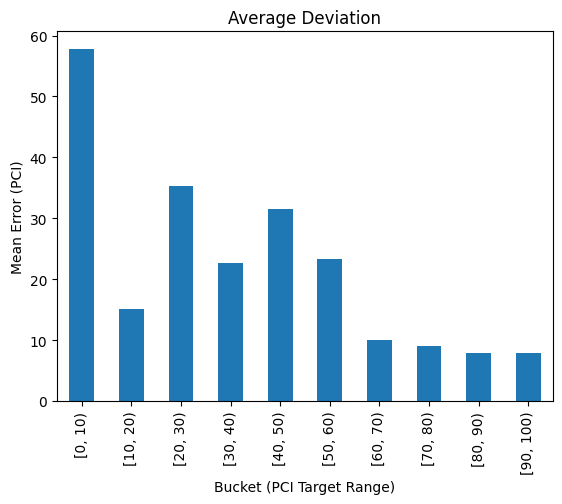

In [14]:
testing_data = pd.read_csv("./testing.csv")
testing_data["Error"] = abs(testing_data["Target"] - testing_data["Predicted"])

buckets = np.arange(0, testing_data['Target'].max() + 10, 10)
testing_data['Bucket'] = pd.cut(testing_data['Target'], bins=buckets, right=False)
bucket_error = testing_data.groupby('Bucket', observed=True)['Error'].mean()


bucket_error.plot(kind='bar')
plt.xlabel('Bucket (PCI Target Range)')
plt.ylabel('Mean Error (PCI)')
plt.title('Average Deviation')
plt.show()